### Objective of the study: Cluster the countries using socio-economic and health factors that determine the overall development of the country and get insoghts out of the clusters

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#load the data
df = pd.read_csv(r'C:\users\91842\Downloads\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [47]:
#check the shape of the data
df.shape

(167, 10)

- Total 167 countries data is present here

In [4]:
#setting the country name as the index:
test = df.set_index('country')
test.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### Apply scaling on the data:

In [5]:
x_scalar = StandardScaler()
x_scaled = x_scalar.fit_transform(test)

##### Applied Elbow method to get the optimum number of clusters to create:

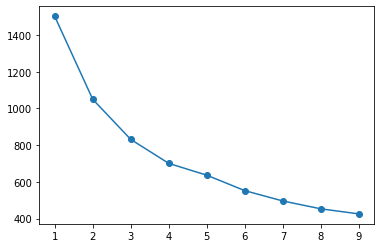

In [6]:
cluster_range = range(1,10)

#to capture the distance once data are fitted to clusters : capture the inertia
cluster_error = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster)
    clusters.fit(x_scaled)
    cluster_error.append(clusters.inertia_)
    
    
plt.plot(cluster_range, cluster_error, marker='o')

##### Check the Silhouette Score for a certain range of clusters:

In [8]:
from sklearn.metrics import silhouette_score
for i in range(2,10):
    labels = KMeans(n_clusters=i).fit(x_scaled).labels_
    print("Silhouette Score for K="+str(i)+" is "+str(silhouette_score(x_scaled, labels)))

Silhouette Score for K=2 is 0.28735668921406704
Silhouette Score for K=3 is 0.28329575683463126
Silhouette Score for K=4 is 0.301375962376881
Silhouette Score for K=5 is 0.30088229124112015
Silhouette Score for K=6 is 0.2296292673013297
Silhouette Score for K=7 is 0.2528419622462353
Silhouette Score for K=8 is 0.2416800678772399
Silhouette Score for K=9 is 0.22647669653590935


- From the Silhouette Score it is clear that the clusters are not very well apart from each other
- It seems at K=4, the score is highest
- But the selection of number of clusters is not s traight forward answer, it can depend on many factors
- For this particlura domain study and the given data I will go with K = 3 (selecting number of clusters=3)

##### KMeans algorithm has been applied to create the clusters:

In [9]:
#apply KMeans
cls_scaled = KMeans(n_clusters=3)

#Fit the scaled data
cls_scaled.fit(x_scaled)

#store the predicted labels
label = cls_scaled.predict(x_scaled)

#create a new column to add the cluster id/labels to the data
test['cluster_id'] = cls_scaled.labels_

#display the first 5 rows of the data
test.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


##### Let's visualize the data different feature-wise:

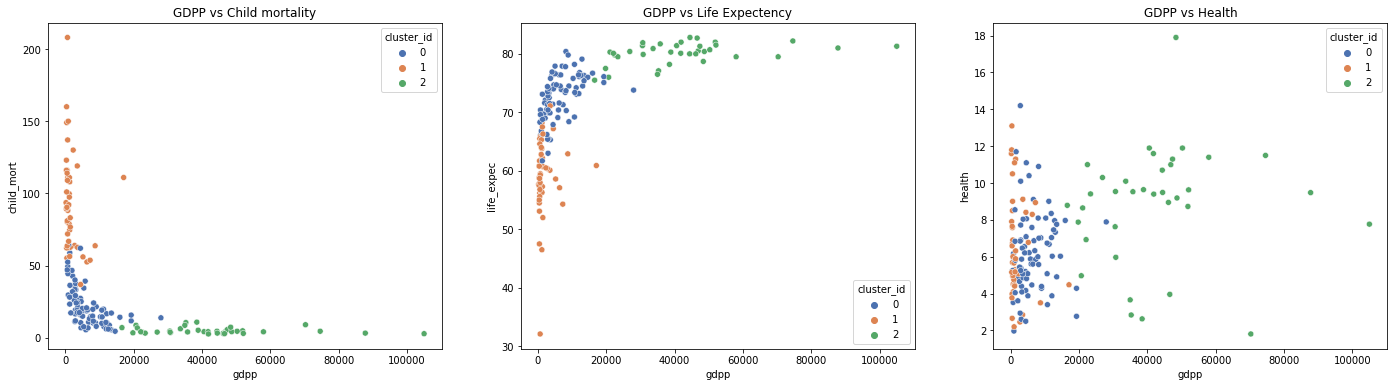

In [48]:
fig, axs = plt.subplots(1,3, figsize = (24,6))

plt.subplot(1,3,1)
sns.scatterplot(data=test, x="gdpp", y="child_mort", hue="cluster_id", palette="deep", sizes=(20, 400))
plt.title('GDPP vs Child mortality');

plt.subplot(1,3,2)
sns.scatterplot(data=test, x="gdpp", y="life_expec", hue="cluster_id", palette="deep", sizes=(20, 400))
plt.title('GDPP vs Life Expectency');

plt.subplot(1,3,3)
sns.scatterplot(data=test, x="gdpp", y="health", hue="cluster_id", palette="deep", sizes=(20, 400))
plt.title('GDPP vs Health');

Observations:
- cluster1 has low GDPP, low life expectency, high child mortality rate
- Whereas, cluster2 has the highest GDPP, high life expectency, very low child mortality rate
- cluster0 is moderate in all the above mentioned aspects

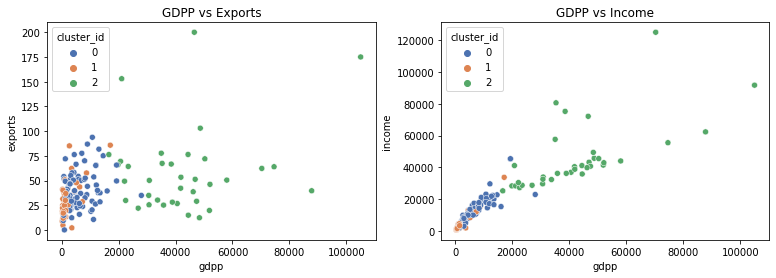

In [62]:
fig, axs = plt.subplots(1,2, figsize = (20,4))

plt.subplot(1,3,1)
sns.scatterplot(data=test, x="gdpp", y="exports", hue="cluster_id", palette="deep", sizes=(20, 400))
plt.title('GDPP vs Exports');

plt.subplot(1,3,2)
sns.scatterplot(data=test, x="gdpp", y="income", hue="cluster_id", palette="deep", sizes=(20, 400))
plt.title('GDPP vs Income');

Observations:
- cluster1 has very low exports. Whereas, cluster2 has the highest exports 
- Net income per person is very high for cluster2 and relatively low in cluster0 and the lowest in cluster1

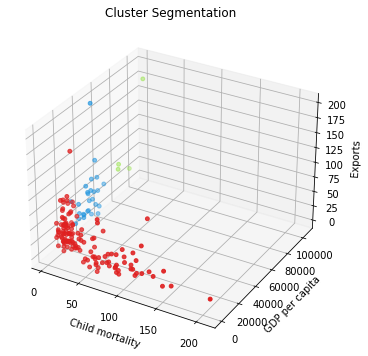

In [58]:
#plot the clusters:
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
test['cluster'] = kmeans.fit_predict(test[['child_mort', 'gdpp', 'exports']])
test['c'] = test.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(test.child_mort, test.gdpp, test.exports,c=test.c, s=15)
ax.set_xlabel('Child mortality')
ax.set_ylabel('GDP per capita')
ax.set_zlabel('Exports')
plt.title('Cluster Segmentation')
plt.show()

## Cluster segmentation and inferences:

In [45]:
cluster_0 = test[test['cluster_id']==0]
print('Total nuber of countries that belong to cluster0 is:' , cluster_0.shape[0])

Total nuber of countries that belong to cluster0 is: 84


In [34]:
cluster_0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381,0.0
std,13.757919,19.029182,2.167233,20.103873,8180.073696,7.849516,3.960745,0.696957,5021.434052,0.0
min,4.500000,0.109000,1.970000,0.065900,1780.000000,-4.210000,61.700000,1.250000,592.000000,0.0
25%,11.650000,26.750000,4.855000,32.150000,6635.000000,2.367500,70.200000,1.750000,2967.500000,0.0
50%,18.350000,37.300000,5.930000,48.650000,10180.000000,5.805000,73.600000,2.235000,4670.000000,0.0
75%,28.350000,51.400000,7.362500,60.425000,16650.000000,10.025000,76.100000,2.662500,9070.000000,0.0
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,0.0


#### Inferences on cluster0:
- Out of total 167 countries 84 countries belong to this cluster.
- This countries have moderate child mortality rate, health spending per capita, average life expectency is approximately 72 years.
- If we look at the GDPP data of such countries it seems that 75% of the countries are below 9070, whereas there are few countries with high GDPP like 28000 as well
- By looking at the import/export data it is clear that these countries are importing more than exporting. Which indicates that the production in such countries are compartively low. 

In [44]:
cluster_1 = test[test['cluster_id']==1]
print('Total nuber of countries that belon to cluster1 is:' , cluster_1.shape[0])

Total nuber of countries that belon to cluster1 is: 47


In [36]:
cluster_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,1.0
std,33.375229,18.160597,2.662015,17.732741,5641.790360,15.509958,6.443521,1.041382,2956.103925,0.0
min,36.900000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000,1.0
25%,63.800000,16.950000,4.520000,29.800000,1390.000000,4.010000,56.650000,4.535000,550.000000,1.0
50%,90.200000,23.800000,5.660000,40.300000,1870.000000,8.920000,59.500000,5.060000,897.000000,1.0
75%,111.000000,38.200000,8.105000,49.450000,3675.000000,16.600000,62.850000,5.635000,1470.000000,1.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0


#### Inferences on cluster1:
- Out of total 167 countries 47 countries belong to this cluster
- This countries have very high child mortality rate. Out of 1000 live births , more than 92 children dying under age 5 years
- Average life expectency is very low, 59 years
- If we look at the GDPP data of such countries it seems that 75% of the countries GDPP is below 1470. And the minimum GDPP is as low as 231
- By looking at the import/export data it is visible that there is a huge gap between the import-export data. Such countries are importing much more than exporting. So, production in such countries are very low. More generally speaking, it would hurt job creation and economic growth in the deficit-running countries

In [46]:
cluster_2 = test[test['cluster_id']==2]
print('Total nuber of countries that belon to cluster2 is:' , cluster_2.shape[0])

Total nuber of countries that belon to cluster2 is: 36


In [38]:
cluster_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444,2.0
std,2.188933,41.930782,3.178015,36.843998,20852.017526,4.077719,1.815742,0.373054,18991.079777,0.0
min,2.600000,12.400000,1.810000,13.600000,25200.000000,-3.220000,75.500000,1.150000,16600.000000,2.0
25%,3.550000,29.700000,7.735000,28.400000,32450.000000,0.451500,79.500000,1.437500,30675.000000,2.0
50%,4.200000,50.350000,9.445000,39.050000,40550.000000,1.190000,80.350000,1.815000,41200.000000,2.0
75%,5.750000,67.925000,10.775000,62.900000,46625.000000,3.647500,81.400000,1.957500,48475.000000,2.0
max,10.800000,200.000000,17.900000,174.000000,125000.000000,16.700000,82.800000,3.030000,105000.000000,2.0


#### Inferences on cluster2:
- Out of total 167 countries only 36 countries belong to this cluster
- This countries have very low child mortality rate, comparetively high health spending per capita, average life expectency is approximately 80 years which is the highest among all the 3 clusters
- The average GDPP is 42494 which is far good in comparison to other clusters
- By looking at the import/export data, it is clear that these countries are exporting more than importing. Which indicates that the production in such countries is higher and so, no or less job crisis too 

### Final Conclusion: Based on the clusters created and the insights retrieved from the same, renaming the clusters for easier explanation, cluster_0  =  'Developing countries',  cluster_1 = 'Under-developed countries', cluster_2 =  'Developed countries'. The above study informs about the different dimensions, the components and the pillar of both development and nondevelopment countries. These study also shows the some of the internal inequality parameters between a development and a nondevelopment country. Few of those identified components are mentioned below.  
- 'Health' : poor health ifrasturcture resulting in high rate of infant/child mortality, poor life expectancy
- 'Economy' : Low net income per person resulting in low GDPP
- 'Trade Deficit' : This indicates less ability to produce, which in turn may harm an economy, or reflect bad aspects of that economy.  

### Action plan/Suggestions:
1. As a data sientist, I would suggest 'HELP' to use their funds by focusing more on the countries which belong to the cluster named, 'Under-developed countries', where demography-wise need is the highest for - public health infrastructure, better life expectancy and lesser rate of infant/child mortality
2. Countries that suffer economically, such economic condition indicators can be like - low net income/person or low GDP/capita
3. Focus on such countries where trading is not balanced in terms of service/products both. Low export indicates lower production, this trade deficit can harm a nation's economy. Thus, it is an impact on overall development of that nation